In [23]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import json
from simulator import popn2_simple_data_morgan

In [24]:
model = CmdStanModel(stan_file='two_popn_number.stan')

In [49]:
n=15
N = [7000,7000,7000]
T = 300
m=2
length=1e6
L = [0.5,10000]
d = popn2_simple_data_morgan(N,T,L,m,length,n,42)


In [50]:
sum(d['y'])/len(d['y'])

0.4752688172043011

In [27]:
def int_p_L_divide_l(N,u,v,t1,t2):
    cu = - (1/N + u/50)
    cv = - (1/N + v/50)
    a1 = np.exp(cu*t2)*(cu*t2-1)/cu**2 - np.exp(cu*t1)*(cu*t1-1)/cu**2
    a2 = np.exp(cv*t2)*(cv*t2-1)/cv**2 - np.exp(cv*t1)*(cv*t1-1)/cv**2
    return (1/(50*N))*(a1-a2)

def likelihood(k,N,u,v,t1,t2):
    lamb = int_p_L_divide_l(N,u,v,t1,t2)
    return np.exp(-lamb)*lamb**k/math.factorial(k)

In [52]:
int_p_L_divide_l(14000,0.5,20000,300,10000000)*200

0.5520016867864063

In [29]:
l = 0
for i in d['y']:
    l+=math.log(likelihood(i,14000,0.5,200,0,1000000000))
l

-4576.825792217078

In [41]:
d['N_obs'] = len(d['y'])
d['N'] = [14000]*3
d['length'] = 200

In [42]:
v = model.pathfinder(data=d)
v.draws()[:,2].mean()

14:47:42 - cmdstanpy - INFO - Chain [1] start processing
14:47:42 - cmdstanpy - INFO - Chain [1] done processing


76.7071865

In [20]:
v

CmdStanVB: model=two_popn_number['method=variational', 'grad_samples=20', 'elbo_samples=1000', 'adapt', 'engaged=1']
 csv_file:
	/var/folders/gm/vzcskl_s1wzfqy1p36xcp32h0000gn/T/tmphuo7a97c/two_popn_numbervvnivkjf/two_popn_number-20241125222823.csv
 output_file:
	/var/folders/gm/vzcskl_s1wzfqy1p36xcp32h0000gn/T/tmphuo7a97c/two_popn_numbervvnivkjf/two_popn_number-20241125222823_0-stdout.txt

In [21]:
model.optimize(data=d)

22:28:38 - cmdstanpy - INFO - Chain [1] start processing
22:28:38 - cmdstanpy - INFO - Chain [1] done processing


CmdStanMLE: model=two_popn_number['method=optimize']
 csv_file:
	/var/folders/gm/vzcskl_s1wzfqy1p36xcp32h0000gn/T/tmphuo7a97c/two_popn_numberkknx6p5k/two_popn_number-20241125222838.csv
 output_file:
	/var/folders/gm/vzcskl_s1wzfqy1p36xcp32h0000gn/T/tmphuo7a97c/two_popn_numberkknx6p5k/two_popn_number-20241125222838_0-stdout.txt

In [22]:
mcmc = model.sample(data=d)
mcmc.summary()

22:28:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:28:47 - cmdstanpy - INFO - CmdStan done processing.
22:28:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'two_popn_number.stan', line 44, column 8 to column 74)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'two_popn_number.stan', line 44, column 8 to column 74)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'two_popn_number.stan', line 40, column 4 to column 20)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'two_popn_number.stan', line 44, column 8 to column 74)
Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'two_popn_number.stan', line 44, column 8 to column 74)
	Exception: poisson_lpmf: Rate parameter is nan, but must be nonnegative! (in 'two_popn_number.stan', line 44, column 8 to column 74)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finit

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-140.9820,0.019433,0.663079,-142.2990,-140.7250,-140.5080,1164.26,588.603,1.00093
T,84.7749,0.169359,6.039000,75.1339,84.9731,94.7568,1271.49,642.816,1.00046


In [44]:
n = 15
N_list = [1000,2000,3000,4000,5000,6000,7000]
T_list = [50,100,150,200,250,300]
columns = ['method','posterior_mean','N','T']
out = pd.DataFrame(columns=columns)
for i in range(len(N_list)):
    for j in range(len(T_list)):
        N = N_list[i]
        T = T_list[j]
        for k in range(15):
            m=2
            length=1e6
            L = [0.5,10000]
            d = popn2_simple_data_morgan([N]*3,T,L,m,length,n,42)
            d['N_obs'] = len(d['y'])
            d['N'] = [N*2]*3
            d['length'] = m*100
            v = model.pathfinder(data=d)

            out = pd.concat([out,pd.DataFrame({'method':['vi'],'posterior_mean':[v.draws()[:,2].mean()],'N':[N],'T':[T]})],ignore_index = True)

14:50:51 - cmdstanpy - INFO - Chain [1] start processing
14:50:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/gm/vzcskl_s1wzfqy1p36xcp32h0000gn/T/ipykernel_24969/635530745.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  out = pd.concat([out,pd.DataFrame({'method':['vi'],'posterior_mean':[v.draws()[:,2].mean()],'N':[N],'T':[T]})],ignore_index = True)
14:51:20 - cmdstanpy - INFO - Chain [1] start processing
14:51:20 - cmdstanpy - INFO - Chain [1] done processing
14:51:48 - cmdstanpy - INFO - Chain [1] start processing
14:51:48 - cmdstanpy - INFO - Chain [1] done processing
14:52:17 - cmdstanpy - INFO - Chain [1] start processing
14:52:17 - cmdstanpy - INFO - Chain [1] done processing
14:52:45 - cmdstanpy - INFO - Chain [1

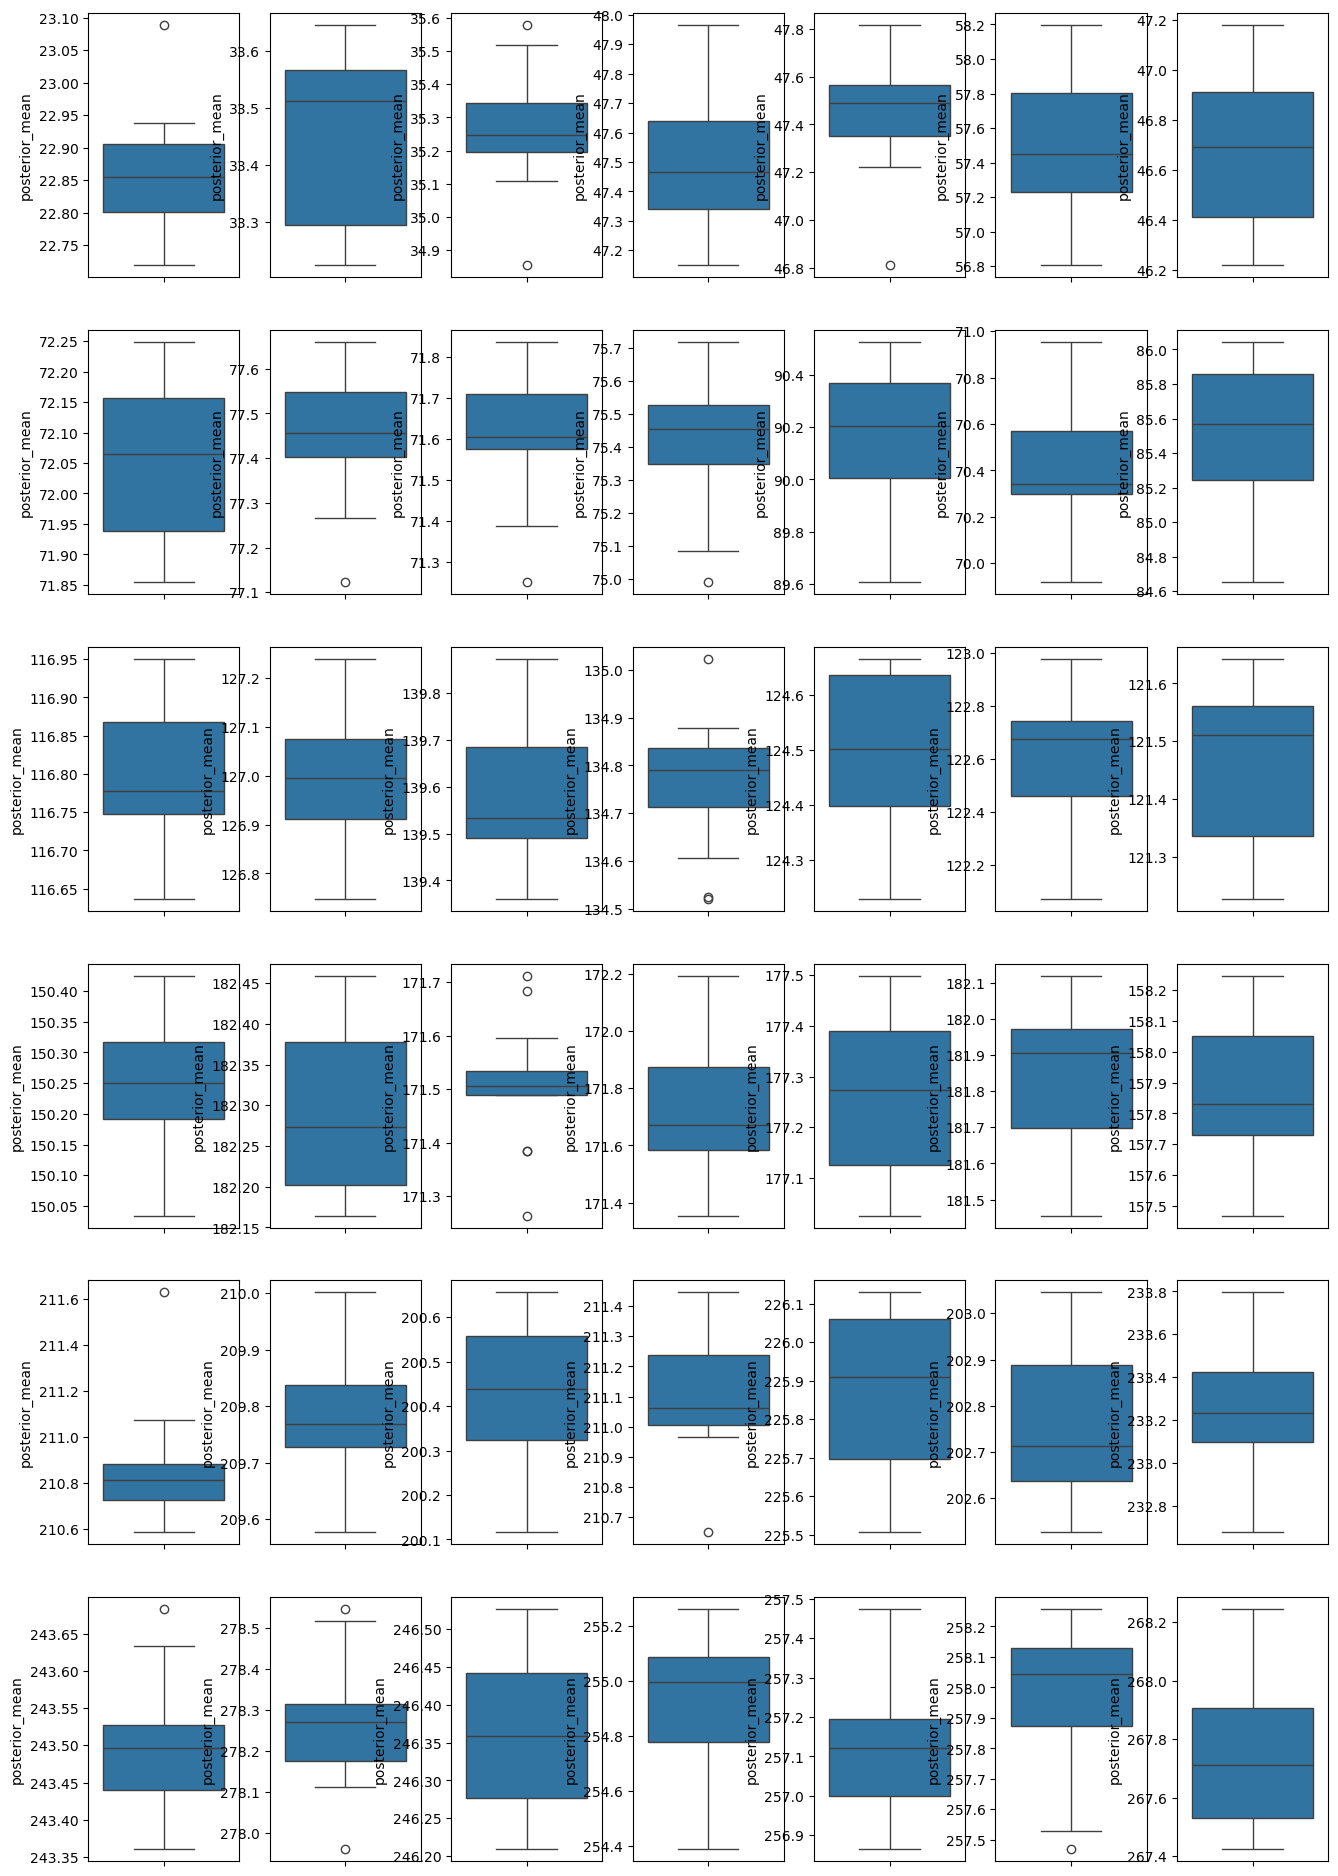

In [48]:
fig, axes = plt.subplots(nrows=6, ncols=7, figsize=(16, 24)) 

for i in range(len(N_list)):
    for j in range(len(T_list)):
        sns.boxplot(out[(out['N']==N_list[i])&(out['T']==T_list[j])]['posterior_mean'],ax = axes[j,i])